<a href="https://colab.research.google.com/github/andrebelem/geemap-tools/blob/main/Exemplo_geemap_tools_%5BCOLAB_version%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# geemap-tools: Demonstração de Funcionalidades

Autor: [Andre L. Belem](mailto:andrebelem@id.uff.br)<br>
Versão: Abril 2025

Este notebook apresenta exemplos práticos das principais funções disponíveis no pacote `geemap-tools`. As rotinas foram desenvolvidas para facilitar o uso do Google Earth Engine com o auxílio das bibliotecas `geemap` e `eemont`, focando especialmente em usuários que desejam realizar análises geoespaciais sem a necessidade de programar em Python avançado.

#### Instalação das Dependências

Se estiver no Google Colab, instale as dependências necessárias com:

```python
!pip install -U eemont geemap git+https://github.com/andrebelem/geemap-tools.git


In [1]:
%%capture
!pip install -U eemont git+https://github.com/andrebelem/geemap-tools.git # fazendo a instalação em silêncio !

Depois disso, basta começar como de costume inicializando o `ee` e o `geemap`.

In [2]:
import ee
import geemap
import geemap_tools as gee

ee.Authenticate()
ee.Initialize(project='ee-andrebelem') # << note que vc tem que mudar para o seu projeto

### Lendo e Gravando uma Região de Interesse (ROI)

Neste pacote, você pode definir sua Região de Interesse (ROI) de duas maneiras:  
- Diretamente por código, se já souber as coordenadas ou área desejada.
- De forma interativa, desenhando sobre o mapa.

Aqui você pode usar duas funções uteis: `roi_to_file` e `file_to_roi`.

No exemplo abaixo, criamos um mapa centrado na Floresta da Tijuca e definimos um `roi` manualmente.  
Em seguida, mostramos como utilizar a função `roi_to_file` para salvar essa ROI em disco.  
Essa funcionalidade é especialmente útil para manter suas regiões organizadas ou compartilhá-las facilmente com outros usuários.



In [3]:
map = geemap.Map(center=[-22.85, -43.16], zoom=10)
map.add_basemap("Esri.WorldImagery")
map

Map(center=[-22.85, -43.16], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchData…

In [4]:
# definindo o roi via `user_roi` do geemap.
roi = map.user_roi

gee.roi_to_file(roi, 'Floresta_da_Tijuca', format='shp') # converte em um arquivo shape e grava no disco

'/content/Floresta_da_Tijuca.shp'

### Utilizando um ROI já salvo

Para garantir consistência nos exemplos, vamos utilizar um arquivo de ROI já disponível no repositório do `geemap-tools`, contendo o shapefile da Floresta da Tijuca.

Neste caso, utilizamos a função `file_to_roi` do pacote `geemap_tools` para ler o arquivo e carregar a região de interesse diretamente.


In [5]:
!wget https://github.com/andrebelem/geemap-tools/raw/refs/heads/main/Floresta_da_Tijuca.zip

--2025-04-27 16:30:05--  https://github.com/andrebelem/geemap-tools/raw/refs/heads/main/Floresta_da_Tijuca.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/andrebelem/geemap-tools/refs/heads/main/Floresta_da_Tijuca.zip [following]
--2025-04-27 16:30:06--  https://raw.githubusercontent.com/andrebelem/geemap-tools/refs/heads/main/Floresta_da_Tijuca.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1203 (1.2K) [application/zip]
Saving to: ‘Floresta_da_Tijuca.zip’

Floresta_da_Tijuca. 100%[===================>]   1.17K  --.-KB/s    in 0s      

2025-04-27 16:30:06 (34.9 MB/s) - ‘Floresta_da_Tij

In [6]:
tijuca = gee.file_to_roi("Floresta_da_Tijuca.zip").geometry() # necessário para pegar apenas a tijuca como roi

In [7]:
# verifique sempre se ele fez a operação de forma correta
tijuca.getInfo()

{'type': 'Polygon',
 'coordinates': [[[-43.343827, -22.88946],
   [-43.345887, -22.922034],
   [-43.328036, -22.93563],
   [-43.333872, -22.965664],
   [-43.321514, -22.985261],
   [-43.30332, -22.981469],
   [-43.295424, -22.98621],
   [-43.301603, -23.001064],
   [-43.286842, -23.005172],
   [-43.277917, -23.002012],
   [-43.258006, -22.989054],
   [-43.234662, -22.97736],
   [-43.22505, -22.966296],
   [-43.216812, -22.959342],
   [-43.192782, -22.945748],
   [-43.186946, -22.940373],
   [-43.216812, -22.926777],
   [-43.234319, -22.93152],
   [-43.258006, -22.938792],
   [-43.268305, -22.929939],
   [-43.2762, -22.915709],
   [-43.297484, -22.910333],
   [-43.321857, -22.898316],
   [-43.343827, -22.88946]]]}

### Listando Imagens de Satélite com `list_sat_images`

A função `list_sat_images` permite listar rapidamente todas as imagens de satélite disponíveis em uma coleção do Google Earth Engine para uma determinada região de interesse (ROI) e intervalo de datas.

Ela gera um DataFrame organizado com informações úteis como:
- Data de aquisição
- Percentual de nuvens
- Nome do satélite
- Azimute e elevação solar
- Percentual de interseção com a ROI

Essa rotina é extremamente útil para ter uma visão geral da disponibilidade de imagens antes de iniciar análises mais complexas.  
Com ela, é possível verificar rapidamente a cobertura de nuvens, selecionar os melhores períodos de imagem, e identificar lacunas temporais nos dados.

**Atenção:** dependendo da coleção escolhida (por exemplo, coleções diárias ou de alta frequência como Sentinel-2), a lista gerada pode ser bastante extensa, especialmente em áreas tropicais ou durante períodos longos de tempo.  
É recomendado ajustar bem a data e o ROI para evitar carregar milhares de registros desnecessariamente.

Outro ponto importante é que `list_sat_images` foi otimizada para funcionar especialmente com coleções do tipo **Landsat** e **Sentinel**. A função identifica automaticamente o tipo de satélite, organizando corretamente os metadados para facilitar a seleção posterior. Essa rotina torna o planejamento de análises de séries temporais, mosaicos ou filtragem por qualidade muito mais eficiente e acessível.


In [8]:
# Vamos usar o Landsat 8 Collection 2 Tier 1 e Level 2 (Produtos de Superífice Corrigida)
# note que se não estou delimitando uma data, ele vai fazer para todo o produto ! O que demora cerca de 5 minutos

collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")

df_landsat = gee.list_sat_images(
    collection_id=collection,
    roi=tijuca,
    #time_range=("2025-01-01", "2025-12-31"),
    max_imgs=500,
    compute_clear_sky=True
)

Coletando metadados: 100%|██████████| 222/222 [03:43<00:00,  1.01s/it]


In [9]:
df_landsat # verificando consistência do arquivo

,id,date,satellite,img_cloud_cover,solar_elevation,solar_azimuth,proportion_roi_%,clear_sky_%
0,LANDSAT/LC08/C02/T1_L2/LC08_216076_20130402,2013-04-02 12:49:49.261,LANDSAT_8,46.21,48.657075,50.825403,100.0,17.512699
1,LANDSAT/LC08/C02/T1_L2/LC08_217076_20130412,2013-04-12 12:53:47.234,LANDSAT_8,21.84,46.493006,46.144557,100.0,96.958537
2,LANDSAT/LC08/C02/T1_L2/LC08_217076_20130428,2013-04-28 12:53:45.720,LANDSAT_8,13.23,42.855143,40.326438,100.0,95.084687
3,LANDSAT/LC08/C02/T1_L2/LC08_217076_20130514,2013-05-14 12:53:57.586,LANDSAT_8,1.52,39.453768,36.513734,100.0,97.379224
4,LANDSAT/LC08/C02/T1_L2/LC08_217076_20130530,2013-05-30 12:54:03.240,LANDSAT_8,95.87,36.752248,34.559646,100.0,0.000000
...,...,...,...,...,...,...,...,...
217,LANDSAT/LC08/C02/T1_L2/LC08_217076_20250208,2025-02-08 12:52:02.749,LANDSAT_8,12.75,56.910828,81.609446,100.0,67.014639
218,LANDSAT/LC08/C02/T1_L2/LC08_217076_20250224,2025-02-24 12:51:52.524,LANDSAT_8,1.72,54.899509,72.345884,100.0,97.340635
219,LANDSAT/LC08/C02/T1_L2/LC08_217076_20250312,2025-03-12 12:51:49.365,LANDSAT_8,15.95,52.421861,62.718606,100.0,82.512171
220,LANDSAT/LC08/C02/T1_L2/LC08_217076_20250328,2025-03-28 12:51:39.031,LANDSAT_8,4.51,49.380755,53.763290,100.0,86.231720


O DataFrame gerado pela função `list_sat_images` apresenta uma tabela com os principais atributos de cada imagem localizada para a coleção e intervalo de datas escolhidos.

Cada linha da tabela corresponde a uma imagem individual, e as colunas representam:

- **id**: Identificador completo da imagem na coleção do Earth Engine.
- **date**: Data e hora de aquisição da imagem.
- **satellite**: Nome do satélite que capturou a imagem (neste caso, sempre `LANDSAT_8`).
- **img_cloud_cover**: Percentual de cobertura de nuvens reportado na imagem.
- **solar_elevation**: Ângulo de elevação solar no momento da aquisição, em graus.
- **solar_azimuth**: Azimute solar (posição do sol em relação ao norte), em graus.
- **proportion_roi_%**: Percentual da região de interesse (ROI) coberta pela imagem.
- **clear_sky_%**: Percentual da ROI livre de nuvens, calculado usando a máscara de nuvem (`QA_PIXEL`).

---

Este resultado permite filtrar rapidamente as melhores imagens para análise, priorizando, por exemplo, aquelas com maior `clear_sky_%` e menor `img_cloud_cover`.

Note que `clear_sky_%` é bem consistente com `img_cloud_cover`.

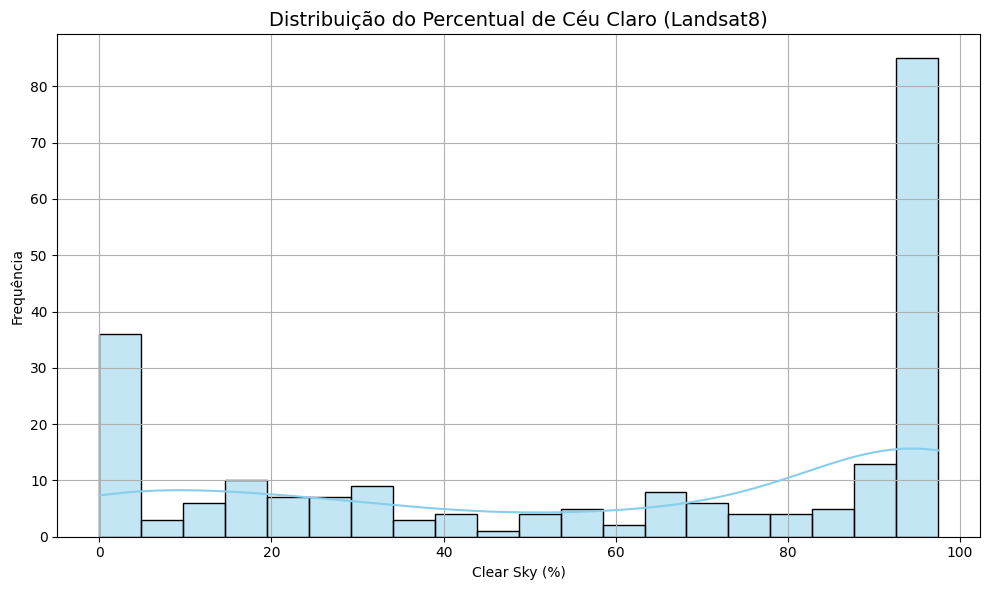

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove valores nulos ou NaN
df_plot = df_landsat.dropna(subset=['clear_sky_%'])

# Cria o histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_plot['clear_sky_%'], bins=20, kde=True, color='skyblue')

# Ajustes visuais
plt.title('Distribuição do Percentual de Céu Claro (Landsat8)', fontsize=14)
plt.xlabel('Clear Sky (%)')
plt.ylabel('Frequência')
plt.grid(True)

# Exibe
plt.tight_layout()
plt.show()

Agora vamos obter o mesmo resultado para o sentinel. Veja que coloquei um range de datas aqui !

In [11]:
# Chamada da função principal
df_sentinel = gee.list_sat_images(
    collection_id="COPERNICUS/S2_SR",
    roi=tijuca,
    max_imgs=500,
    compute_clear_sky=True,
    time_range=("2025-01-01", "2025-12-31")
)

Coletando metadados: 100%|██████████| 23/23 [00:22<00:00,  1.03it/s]


In [12]:
df_sentinel # e o resultado ...

,id,date,satellite,img_cloud_cover,solar_elevation,solar_azimuth,proportion_roi_%,clear_sky_%
0,COPERNICUS/S2_SR/20250102T130249_20250102T1307...,2025-01-02 13:08:36.451,Sentinel-2B,15.732500,64.830587,94.905422,100.0,56.455451
1,COPERNICUS/S2_SR/20250112T130249_20250112T1302...,2025-01-12 13:08:35.975,Sentinel-2B,93.090373,63.685154,92.194494,100.0,0.000000
2,COPERNICUS/S2_SR/20250117T130241_20250117T1302...,2025-01-17 13:08:35.052,Sentinel-2A,29.836759,63.123120,90.321336,100.0,95.791462
3,COPERNICUS/S2_SR/20250122T130249_20250122T1305...,2025-01-22 13:08:37.798,Sentinel-2B,71.410829,62.578214,88.141344,100.0,29.626495
4,COPERNICUS/S2_SR/20250127T130311_20250127T1305...,2025-01-27 13:09:04.429,Sentinel-2C,97.216970,62.121361,85.641290,100.0,0.000000
5,COPERNICUS/S2_SR/20250201T130249_20250201T1302...,2025-02-01 13:08:39.033,Sentinel-2B,93.283498,61.455826,83.024154,100.0,0.000408
6,COPERNICUS/S2_SR/20250206T130311_20250206T1303...,2025-02-06 13:09:03.309,Sentinel-2C,6.063148,60.962321,80.088793,100.0,100.000000
7,COPERNICUS/S2_SR/20250211T130249_20250211T1302...,2025-02-11 13:08:39.929,Sentinel-2B,60.071480,60.263244,77.131532,100.0,1.778152
8,COPERNICUS/S2_SR/20250216T130311_20250216T1303...,2025-02-16 13:08:59.799,Sentinel-2C,0.261422,59.689003,73.922271,100.0,100.000000
9,COPERNICUS/S2_SR/20250221T130249_20250221T1302...,2025-02-21 13:08:41.056,Sentinel-2B,10.686066,58.925608,70.767505,100.0,24.867410


In [13]:
# note que posso usar a função de clear sky em uma imagem única !
img = ee.Image(df_sentinel.id[0])
clear_sky_target = gee.get_clear_sky_percentage(img,tijuca)

print(f'Percentual de Céu Claro da imagem {df_sentinel.id[0]}: {clear_sky_target:.1f}%')

Percentual de Céu Claro da imagem COPERNICUS/S2_SR/20250102T130249_20250102T130726_T23KPQ: 56.5%


In [14]:
# vamos criar um mapa para mostrar como essa imagem se apresenta
Map = geemap.Map()
Map.centerObject(tijuca, zoom=11)
Map.addLayer(img, {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000}, 'RGB')
Map.addLayer(tijuca, {'color': 'blue'}, 'ROI Tijuca')
Map

Map(center=[-22.949512677160616, -43.28100173805031], controls=(WidgetControl(options=['position', 'transparen…

### Visualizando Nuvens em uma Imagem Landsat 8

Neste exemplo, selecionamos uma imagem do Landsat 8 que possui presença significativa de nuvens, com o objetivo de visualizar tanto a imagem original quanto a máscara de nuvens gerada a partir do atributo `QA_PIXEL`.

Os passos realizados são:

- Selecionar uma imagem específica da coleção `LANDSAT/LC08/C02/T1_L2`.
- Visualizar a banda vermelha (`SR_B4`) em tons de cinza para facilitar a identificação visual.
- Criar uma máscara de nuvens utilizando o bit 3 da banda `QA_PIXEL`, que indica a presença de nuvens.
- Adicionar ao mapa a imagem original, a máscara de nuvens destacada em vermelho e o contorno da região de interesse (Floresta da Tijuca).


In [15]:
# Seleciona a imagem Landsat 8 que tem nuvens
img = ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_217076_20180613")

# Seleciona uma banda visível para visualização em tons de cinza
gray_vis = {
    'bands': ['SR_B4'],  # Banda vermelha
    'min': 5000,
    'max': 16000,
    'gamma': 1.2
}

# Cria o mapa centrado na imagem
Map = geemap.Map()
Map.centerObject(tijuca, zoom=11)

# Adiciona a imagem original em escala de cinza
Map.addLayer(img, gray_vis, "Imagem em cinza (SR_B4)")

# Opcional: Adiciona a máscara de nuvem (QA_PIXEL bit 3)
cloud_mask = img.select('QA_PIXEL').bitwiseAnd(1 << 3).neq(0)
Map.addLayer(cloud_mask.updateMask(cloud_mask), {'palette': ['red']}, 'Máscara de nuvem (QA_PIXEL)')
# Adiciona o contorno do ROI
Map.addLayer(tijuca, {'color': 'blue'}, 'Floresta da Tijuca')

Map

Map(center=[-22.949512677160616, -43.28100173805031], controls=(WidgetControl(options=['position', 'transparen…

In [16]:
# Carrega a imagem Sentinel-2 que também tem nuvens
img = ee.Image("COPERNICUS/S2_SR/20181225T130249_20181225T130243_T23KPQ")

# Visualização em tons de cinza (banda B4 - vermelho)
gray_vis = {
    'bands': ['B4'],  # Banda vermelha (10m)
    'min': 0,
    'max': 3000,
    'gamma': 1.2
}

# Cria máscara de nuvem com base na banda SCL
# Códigos 6, 7, 8, 9 representam diferentes tipos de nuvens
scl = img.select('SCL')
cloud_mask = scl.remap([6, 7, 8, 9], [1, 1, 1, 1], defaultValue=0).rename('cloud')
cloud_mask = cloud_mask.updateMask(cloud_mask)  # aplica máscara apenas onde há nuvem

# Cria o mapa
Map = geemap.Map()
Map.centerObject(tijuca, zoom=11)

# Adiciona a imagem em tons de cinza
Map.addLayer(img, gray_vis, "Imagem em cinza (B4 - Sentinel-2)")

# Adiciona a máscara de nuvem
Map.addLayer(cloud_mask, {'palette': ['red']}, 'Máscara de Nuvem (SCL)')

# Adiciona a ROI
Map.addLayer(tijuca, {'color': 'blue'}, 'Floresta da Tijuca')

Map

Map(center=[-22.949512677160616, -43.28100173805031], controls=(WidgetControl(options=['position', 'transparen…

## Análise de Séries Temporais

Neste exemplo, vamos utilizar novamente a função `list_sat_images` para buscar imagens e gerar uma série temporal de NDVI utilizando dados do Sentinel.

A ideia é explorar o máximo possível da série histórica disponível entre 2015 e 2025.  
Entretanto, é importante observar que ao trabalhar com um volume muito grande de imagens (aproximadamente 466 imagens nesse caso), o uso intensivo do `googleapiclient` pode levar à saturação da conexão, gerando erros ou lentidão.

Por boas práticas, o ideal seria dividir a busca em intervalos menores (por exemplo, por ano ou por estação).  
No entanto, aqui o objetivo é testar o desempenho e explorar toda a capacidade da coleção de uma só vez.

Este teste também ilustra a necessidade de estratégias de otimização para séries temporais longas no Earth Engine. Note que a listagem das imagens demora em torno de **12 minutos** !!


In [17]:
df_sentinel = gee.list_sat_images(
    collection_id=ee.ImageCollection("COPERNICUS/S2_SR"),
    roi=tijuca,
    max_imgs=500,
    compute_clear_sky=True,
    time_range=("2015-01-01", "2025-12-31")
)

Coletando metadados: 100%|██████████| 466/466 [07:16<00:00,  1.07it/s]


## Criando uma Série Temporal do NDVI

Agora que já temos o `df_landsat` e `df_sentinel`, vamos criar uma série temporal utilizando a média e o desvio padrão do NDVI (Índice de Vegetação por Diferença Normalizada).

Vamos usar a função `index_to_timeseries`, que pode ser aplicada a qualquer índice disponível no pacote [`eemont`](https://eemont.readthedocs.io/en/latest/). Recomendo dar uma olhada na documentação para conhecer todos os índices suportados!

> ⚠️ Atenção: Se estiver trabalhando com conjuntos de dados muito grandes, essa operação pode demorar um pouco para ser concluída.


In [19]:
# Supondo que você já tenha carregado 'tijuca' como ee.Geometry !
df_ndvi_landsat = gee.index_to_timeseries(df_landsat, tijuca, index_name='NDVI', debug=False)
df_ndvi_sentinel = gee.index_to_timeseries(df_sentinel, tijuca, index_name='NDVI', debug=False)

Calculando NDVI na ROI: 100%|██████████| 466/466 [06:35<00:00,  1.18it/s]


Verifique sempre o resultado !

In [20]:
df_ndvi_landsat.head() # verificando...

,id,date,satellite,img_cloud_cover,solar_elevation,solar_azimuth,proportion_roi_%,clear_sky_%,NDVI_mean,NDVI_std
0,LANDSAT/LC08/C02/T1_L2/LC08_216076_20130402,2013-04-02 12:49:49.261,LANDSAT_8,46.21,48.657075,50.825403,100.0,17.512699,0.284645,0.073496
1,LANDSAT/LC08/C02/T1_L2/LC08_217076_20130412,2013-04-12 12:53:47.234,LANDSAT_8,21.84,46.493006,46.144557,100.0,96.958537,0.328675,0.079011
2,LANDSAT/LC08/C02/T1_L2/LC08_217076_20130428,2013-04-28 12:53:45.720,LANDSAT_8,13.23,42.855143,40.326438,100.0,95.084687,0.326340,0.092759
3,LANDSAT/LC08/C02/T1_L2/LC08_217076_20130514,2013-05-14 12:53:57.586,LANDSAT_8,1.52,39.453768,36.513734,100.0,97.379224,0.331219,0.097089
4,LANDSAT/LC08/C02/T1_L2/LC08_217076_20130530,2013-05-30 12:54:03.240,LANDSAT_8,95.87,36.752248,34.559646,100.0,0.000000,0.090646,0.047449


Vamos fazer um plot comparativo ..... Modifique para sua aplicação

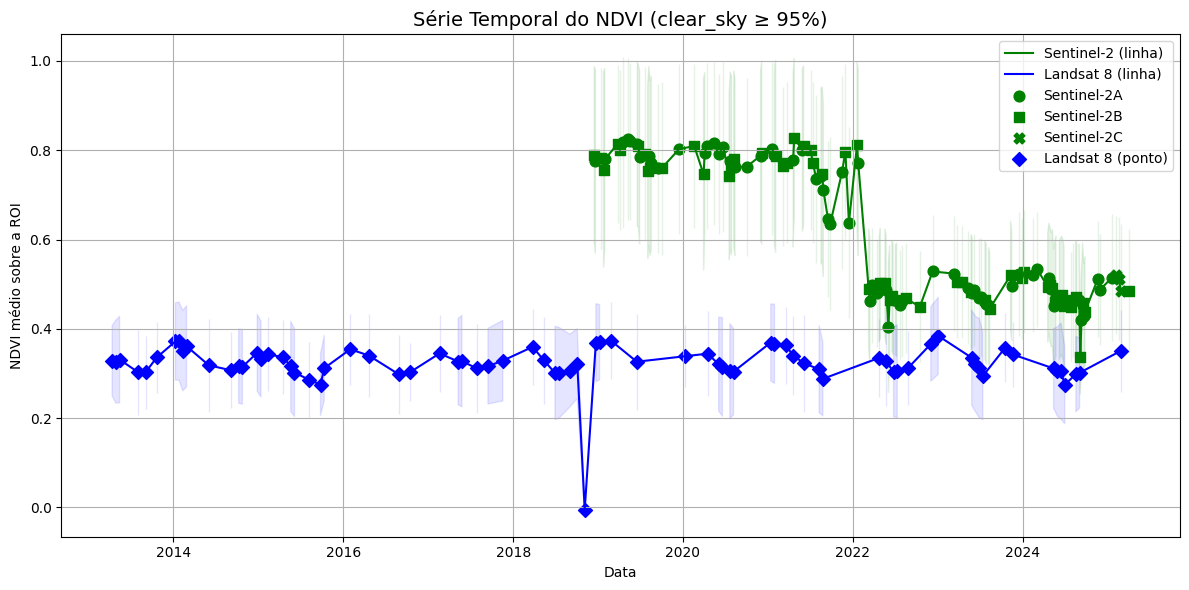

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ordena os DataFrames por data
df_ndvi_landsat = df_ndvi_landsat.sort_values("date")
df_ndvi_sentinel = df_ndvi_sentinel.sort_values("date")

# Cópias para o plot
df_ndvi_landsat_plot = df_ndvi_landsat.copy()
df_ndvi_sentinel_plot = df_ndvi_sentinel.copy()

# Filtro para visualização: clear_sky_% < 95 → NDVI_mean/std = NaN
df_ndvi_landsat_plot.loc[df_ndvi_landsat_plot['clear_sky_%'] < 95, ['NDVI_mean', 'NDVI_std']] = np.nan
df_ndvi_sentinel_plot.loc[df_ndvi_sentinel_plot['clear_sky_%'] < 95, ['NDVI_mean', 'NDVI_std']] = np.nan

# Inicia o gráfico
plt.figure(figsize=(12, 6))

# Faixa de std - Sentinel
plt.fill_between(
    df_ndvi_sentinel_plot['date'],
    df_ndvi_sentinel_plot['NDVI_mean'] - df_ndvi_sentinel_plot['NDVI_std'],
    df_ndvi_sentinel_plot['NDVI_mean'] + df_ndvi_sentinel_plot['NDVI_std'],
    color='green', alpha=0.1
)

# Faixa de std - Landsat
plt.fill_between(
    df_ndvi_landsat_plot['date'],
    df_ndvi_landsat_plot['NDVI_mean'] - df_ndvi_landsat_plot['NDVI_std'],
    df_ndvi_landsat_plot['NDVI_mean'] + df_ndvi_landsat_plot['NDVI_std'],
    color='blue', alpha=0.1
)

# Linha média do NDVI - Sentinel
sns.lineplot(
    data=df_ndvi_sentinel_plot,
    x='date', y='NDVI_mean',
    label='Sentinel-2 (linha)',
    color='green'
)

# Linha média do NDVI - Landsat
sns.lineplot(
    data=df_ndvi_landsat_plot,
    x='date', y='NDVI_mean',
    label='Landsat 8 (linha)',
    color='blue'
)

# ░░░ Pontos sobre a curva Sentinel, diferenciando por satélite ░░░
sentinel_symbols = {
    'Sentinel-2A': 'o',  # Círculo
    'Sentinel-2B': 's',  # Quadrado
    'Sentinel-2C': 'X',  # X
}

for sat, marker in sentinel_symbols.items():
    subset = df_ndvi_sentinel_plot[df_ndvi_sentinel_plot['satellite'] == sat]
    plt.scatter(
        subset['date'], subset['NDVI_mean'],
        color='green', marker=marker, s=60, label=f'{sat}'
    )

# ░░░ Pontos sobre a curva Landsat (inclusive onde NDVI_mean é NaN) ░░░
plt.scatter(
    df_ndvi_landsat['date'],
    df_ndvi_landsat_plot['NDVI_mean'],  # usa os NaN filtrados
    color='blue', marker='D', s=50, label='Landsat 8 (ponto)'
)

# Ajustes visuais
plt.title('Série Temporal do NDVI (clear_sky ≥ 95%)', fontsize=14)
plt.xlabel('Data')
plt.ylabel('NDVI médio sobre a ROI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Interpretação da Série Temporal de NDVI - Landsat vs Sentinel-2

A figura acima apresenta a série temporal do NDVI médio para duas plataformas de satélites:
- **Landsat 8** (em azul)
- **Sentinel-2A/B/C** (em verde, com símbolos diferentes para cada satélite)

É possível observar que o NDVI derivado do Sentinel-2 é consistentemente mais alto do que o do Landsat 8 para a mesma região e período de observação. As principais razões para essa diferença incluem:

- **Resolução espacial**: Sentinel-2 possui resolução espacial mais fina (10 metros para a banda do NDVI), enquanto Landsat 8 opera em 30 metros. Isso permite que o Sentinel capture feições vegetadas menores que poderiam ser diluídas na média dos pixels do Landsat.
- **Especificidade espectral**: As bandas do Sentinel-2 são mais otimizadas para vegetação, especialmente no red-edge, o que melhora a sensibilidade a variações sutis no vigor da vegetação.
- **Frequência de revisita**: O Sentinel-2 revisita a mesma área com mais frequência, reduzindo o risco de captar cenas sob condições atípicas (ex.: após estresse hídrico ou eventos extremos).
- **Processamento atmosférico**: As correções atmosféricas aplicadas em cada missão são diferentes (ex.: Sen2Cor para Sentinel e LaSRC para Landsat), podendo introduzir pequenas divergências nos valores de reflectância de superfície.

Ainda assim, a queda abrupta no NDVI do Sentinel-2 observada a partir de 2022 pode estar relacionada a:

- **Mudança no sistema de observação**: Em 2022, o Sentinel-2C começou a operar. Pequenas diferenças de calibração entre satélites (A, B e C) podem gerar mudanças sistemáticas nos índices se não forem devidamente harmonizadas.
- **Problemas na correção atmosférica**: Variações na qualidade do produto atmosférico (ex.: presença de aerossóis não detectados) podem afetar a acurácia dos índices derivados.
- **Alteração da área analisada**: Caso a região de interesse (ROI) tenha sido modificada ou tenha sofrido mudança de uso do solo (ex.: urbanização), o NDVI médio tenderia a diminuir. Porém, isso não explicaria porque o Landsat 8 se mantém estável

> 🔎 Uma análise complementar usando dados de precipitação, índices de seca (ex.: SPI) ou imagens visuais da região poderia ajudar a confirmar a causa da mudança em 2022.



## Conclusão

Este notebook mostrou como trabalhar com o `geemap-tools`, listando e separando imagens, além de construir uma análise temporal do NDVI usando imagens Landsat e Sentinel-2, destacando diferenças importantes entre as plataformas e evidenciando eventos de variação na cobertura vegetal ao longo do tempo.

A exploração do NDVI é apenas uma das muitas possibilidades! Com pequenas adaptações, você pode aplicar o mesmo fluxo de trabalho para outros índices de vegetação, umidade do solo, detecção de queimadas, entre muitos outros disponíveis no pacote [`eemont`](https://eemont.readthedocs.io/en/latest/).

Fique à vontade para experimentar, adaptar e expandir esse código para suas necessidades.  
Se você desenvolver alguma função extra ou melhoria interessante, sinta-se convidado(a) a interagir com o repositório original e enviar um **Pull Request**!  
Será um prazer receber suas contribuições!

> 🚀 Ciência aberta se faz assim: colaborando e compartilhando!


[Andre L. Belem](mailto:andrebelem@id.uff.br)

